# Using Web Scraping to collect data and creating a linear regression model

In this project, we'll gather our data from arabam.com, one of the websites for auto sales, and at the end of the day, we'll create a linear regression model to forecast the price of a car with the help of given details. 

Let's get going!

In [11]:
# importing libraries

In [3]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time, os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [13]:
# create pages list for arabam.com to get each car's link

In [14]:
def get_pages_list():
    first_page = "https://www.arabam.com/ikinci-el/otomobil?take=50"
    page_list = []
    for i in range(2, 50):
        page_list.append(first_page + "&page=" + str(i))
    
    return page_list


In [15]:
get_pages_list()

['https://www.arabam.com/ikinci-el/otomobil?take=50&page=2',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=3',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=4',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=5',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=6',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=7',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=8',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=9',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=10',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=11',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=12',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=13',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=14',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=15',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=16',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=17',
 'https://www.ar

In [16]:
def scroll_down():
    for j in range(2):
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")  # Kaydırma İşlemi
        time.sleep(1)  # wait for one second after each scroll


In [17]:
# defining chrome driver path

In [2]:
chrome_driver_path = "/Users/zehragul/Documents/Development/chromedriver"
service = ChromeService(executable_path=chrome_driver_path)
driver = webdriver.Chrome(service=service)

In [ ]:
# getting all the sale cars links and writing them into car_list.txt

In [ ]:
page_list = get_pages_list()
links_list = []

for page in page_list:
    
    soup = BeautifulSoup(driver.page_source, "html.parser")
    links = soup.find_all(name="a", class_="link-overlay")

    driver.get(page)
    for link in links:
        item_link = "https://www.arabam.com" + link.get('href')
        
        if item_link not in links_list:
            links_list.append(item_link)
        

print(f"link sayisi :  {len(links_list)}")
print(links_list)

with open("car_list.txt","w") as data_file:
    for link in links_list:
        data_file.write(link+ "\n")



driver.quit()

In [ ]:
# getting information about the car like price, age, brand, model etc. and writing them into cars.csv file

In [ ]:
with open("car_list.txt","r") as data_file:
    cars = data_file.readlines()


result = []

for car in cars:

    driver.get(cars)
    driver.implicitly_wait(2)
    scroll_down()


    try:
        fiyat = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/div[1]/div/div').text.replace("TL","")
        fiyat = fiyat.replace(".", "")
    except:
        fiyat = np.nan
    
    try:
        yil = int(driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[6]/span[2]').text)
    except:
        yil = np.nan
    
    try:
        marka = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[3]/span[2]').text
    except:
        marka = np.nan
    
    try:
        seri = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[4]/span[2]').text
    except:
        seri = np.nan
    
    try:
        model = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[5]/span[2]').text
    except:
        model = np.nan

    try:
        kilometre = float(driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[7]/span[2]').text.replace("km","").strip())
    except:
        kilometre = np.nan
    
    try:
        vites_tipi = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[8]/span[2]').text
    except:
        vites_tipi = np.nan
    
    try:
        yakit_tipi = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[9]/span[2]').text
    except:
        yakit_tipi = np.nan
    
    try:
        motor_hacmi = float(driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[11]/span[2]').text.replace("cc",""))
    except:
        motor_hacmi = np.nan
    
    try:
        motor_gucu = float(driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[12]/span[2]').text.replace("hp",""))
    except:
        motor_gucu = np.nan

    try:
        cekis = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[13]/span[2]').text
    except:
        cekis = np.nan
    
    try:
        yakit_deposu = float(driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[15]/span[2]').text.replace("lt",""))
    except:
        yakit_deposu = np.nan
    
    try:
        boya_degisen = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[16]/a').text
    except:
        boya_degisen = np.nan
    
    new_row =[fiyat,yil,renk, marka , seri , model, kilometre, vites_tipi, yakit_tipi, cekis, ort_yakit_tuk, yakit_deposu,tork, motor_hacmi, motor_gucu, koltuk_sayisi, boya_degisen]
    result.append(new_row)

    
columns = ["fiyat", "yil", "marka" , "seri" , "model", "kilometre", "vites_tipi", "yakit_tipi", "cekis", "ort_yakit_tuk", "yakit_deposu", "motor_hacmi", "motor_gucu", "boya_degisen"]
df = pd.DataFrame.from_records(result, columns=columns)
df.to_csv("cars.csv", index_label=False)
print(f"link sayisi :  {len(result)}")

In [382]:
cars = pd.read_csv("cars.csv")

In [383]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2153 non-null   int64  
 1   fiyat         2153 non-null   int64  
 2   yil           2147 non-null   float64
 3   renk          0 non-null      float64
 4   marka         2153 non-null   object 
 5   seri          2153 non-null   object 
 6   model         2153 non-null   object 
 7   kilometre     2146 non-null   float64
 8   vites_tipi    2151 non-null   object 
 9   yakit_tipi    2153 non-null   object 
 10  cekis         2105 non-null   object 
 11  yakit_deposu  1853 non-null   float64
 12  motor_hacmi   2068 non-null   float64
 13  motor_gucu    2058 non-null   float64
 14  boya_degisen  1140 non-null   object 
dtypes: float64(6), int64(2), object(7)
memory usage: 252.4+ KB


In [384]:
cars.drop(["Unnamed: 0","renk"], axis= 1, inplace=True)

In [385]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fiyat         2153 non-null   int64  
 1   yil           2147 non-null   float64
 2   marka         2153 non-null   object 
 3   seri          2153 non-null   object 
 4   model         2153 non-null   object 
 5   kilometre     2146 non-null   float64
 6   vites_tipi    2151 non-null   object 
 7   yakit_tipi    2153 non-null   object 
 8   cekis         2105 non-null   object 
 9   yakit_deposu  1853 non-null   float64
 10  motor_hacmi   2068 non-null   float64
 11  motor_gucu    2058 non-null   float64
 12  boya_degisen  1140 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 218.8+ KB


In [386]:
cars['boya_degisen'].value_counts()

Tamamı orjinal          354
1 boyalı                 92
2 boyalı                 86
3 boyalı                 62
4 boyalı                 45
1 değişen                42
1 değişen, 1 boyalı      29
1 değişen, 2 boyalı      29
1 değişen, 4 boyalı      27
1 değişen, 3 boyalı      27
2 değişen, 2 boyalı      25
5 boyalı                 24
1 değişen, 5 boyalı      19
2 değişen                19
Tamamı boyalı            17
6 boyalı                 16
2 değişen, 3 boyalı      16
2 değişen, 1 boyalı      15
2 değişen, 4 boyalı      13
8 boyalı                 10
12 boyalı                10
3 değişen, 3 boyalı       9
1 değişen, 9 boyalı       9
7 boyalı                  9
9 boyalı                  9
1 değişen, 8 boyalı       8
3 değişen, 4 boyalı       8
3 değişen                 8
1 değişen, 6 boyalı       7
2 değişen, 7 boyalı       7
2 değişen, 6 boyalı       7
10 boyalı                 7
3 değişen, 1 boyalı       6
1 değişen, 7 boyalı       6
1 değişen, 12 boyalı      6
2 değişen, 8 boyalı 

boya_degisen sutunundaki ifadeleri boyali_parca ve degisen_parca olarak duzenlemek icin satirlari tek tek okuttuk

In [387]:
for i in range(len(cars)):
    boya_degisen = str(cars.loc[i, 'boya_degisen'])

    if len(boya_degisen.split(",")) == 1:
        # "1 degisen", "2 boyali" ,"Tamami orjinal" veya "Tamami boyali"seklinde olanlar icin

        if len(boya_degisen.strip().split(" ")) > 1 and ('boyalı' == boya_degisen.strip().split(" ")[1]):
            cars.loc[i, 'boyali_parca'] = boya_degisen.split(" ")[0]
            cars.loc[i, 'degisen_parca'] = 0
        elif len(boya_degisen.strip().split(" ")) > 1 and ('değişen' == boya_degisen.strip().split(" ")[1]):
            cars.loc[i, 'degisen_parca'] = boya_degisen.split(" ")[0]
            cars.loc[i, 'boyali_parca'] = 0

        elif len(boya_degisen.strip().split(" ")) > 1 and ("Tamamı orjinal" == boya_degisen.strip()):
            cars.loc[i, 'degisen_parca'] = "Tamamı orjinal"
            cars.loc[i, 'boyali_parca'] = "Tamamı orjinal"

        elif len(boya_degisen.strip().split(" ")) > 1 and ("Tamamı boyalı" == boya_degisen.strip()):
            cars.loc[i, 'boyali_parca'] = "Tamamı boyalı"
            cars.loc[i, 'degisen_parca'] = "0"
        else:

            cars.loc[i, 'boyali_parca'] = "0"
            cars.loc[i, 'degisen_parca'] = "0"

    if len(boya_degisen.split(",")) == 2:
        # "2 değişen, 4 boyalı" seklinde olanlar icin
        if 'boyalı' == boya_degisen.strip().split(",")[1].strip().split(" ")[1]:
            cars.loc[i,'boyali_parca'] = boya_degisen.split(",")[1].strip().split(" ")[0]

        if 'değişen' == boya_degisen.strip().split(",")[0].strip().split(" ")[1]:
            cars.loc[i, 'degisen_parca'] = boya_degisen.split(",")[0].strip().split(" ")[0]

cars.to_csv("new.csv") 

In [388]:

new_df = pd.read_csv("new.csv")

In [389]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2153 non-null   int64  
 1   fiyat          2153 non-null   int64  
 2   yil            2147 non-null   float64
 3   marka          2153 non-null   object 
 4   seri           2153 non-null   object 
 5   model          2153 non-null   object 
 6   kilometre      2146 non-null   float64
 7   vites_tipi     2151 non-null   object 
 8   yakit_tipi     2153 non-null   object 
 9   cekis          2105 non-null   object 
 10  yakit_deposu   1853 non-null   float64
 11  motor_hacmi    2068 non-null   float64
 12  motor_gucu     2058 non-null   float64
 13  boya_degisen   1140 non-null   object 
 14  boyali_parca   2153 non-null   object 
 15  degisen_parca  2153 non-null   object 
dtypes: float64(5), int64(2), object(9)
memory usage: 269.2+ KB


In [390]:
new_df.columns

Index(['Unnamed: 0', 'fiyat', 'yil', 'marka', 'seri', 'model', 'kilometre',
       'vites_tipi', 'yakit_tipi', 'cekis', 'yakit_deposu', 'motor_hacmi',
       'motor_gucu', 'boya_degisen', 'boyali_parca', 'degisen_parca'],
      dtype='object')

In [391]:
new_df.drop(["Unnamed: 0"], axis= 1, inplace=True)

In [392]:
new_df.drop(["boya_degisen"], axis= 1, inplace=True)

In [393]:
new_df.head()


,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
0,125000,2006.0,Ford,Fiesta,1.4 TDCi Comfort,400.0,Düz,Dizel,Önden Çekiş,45.0,1399.0,68.0,0,0
1,1499750,2013.0,Mercedes - Benz,E,250 CDI Premium,145.0,Otomatik,Dizel,4WD (Sürekli),59.0,2143.0,204.0,0,0
2,515000,2016.0,Volkswagen,Golf,1.6 TDi BlueMotion Midline Plus,169.0,Düz,Dizel,Önden Çekiş,50.0,1598.0,90.0,Tamamı orjinal,Tamamı orjinal
3,405000,2012.0,Ford,Focus,1.6 TDCi Trend X,225.0,Düz,Dizel,Önden Çekiş,53.0,1560.0,95.0,6,0
4,710000,2013.0,Audi,A3,A3 Sedan 1.6 TDI Ambition,185.0,Yarı Otomatik,Dizel,Önden Çekiş,50.0,1598.0,105.0,2,1


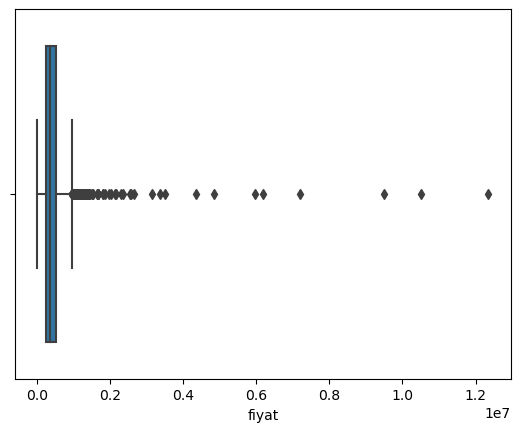

In [394]:
plt.plot()
sns.boxplot(x=new_df.fiyat);

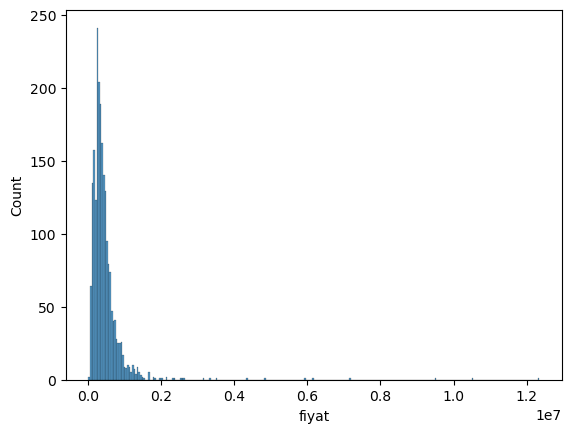

In [395]:
plt.plot()
sns.histplot(x=new_df.fiyat);

In [396]:
import numpy as np

p_25, p_75 = np.percentile(new_df['fiyat'], [25, 75])
iqr = p_75 - p_25

upper_bound = p_75 + 1.5 * iqr
lower_bound  = p_25 - 1.5 * iqr
print(upper_bound, lower_bound)

947500.0 -192500.0


In [397]:
new_df.drop(new_df[new_df.fiyat > 947500].index, inplace=True)

In [398]:
new_df

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
0,125000,2006.0,Ford,Fiesta,1.4 TDCi Comfort,400.0,Düz,Dizel,Önden Çekiş,45.0,1399.0,68.0,0,0
2,515000,2016.0,Volkswagen,Golf,1.6 TDi BlueMotion Midline Plus,169.0,Düz,Dizel,Önden Çekiş,50.0,1598.0,90.0,Tamamı orjinal,Tamamı orjinal
3,405000,2012.0,Ford,Focus,1.6 TDCi Trend X,225.0,Düz,Dizel,Önden Çekiş,53.0,1560.0,95.0,6,0
4,710000,2013.0,Audi,A3,A3 Sedan 1.6 TDI Ambition,185.0,Yarı Otomatik,Dizel,Önden Çekiş,50.0,1598.0,105.0,2,1
5,510000,2015.0,Ford,Focus,1.6 TDCi Trend X,148.0,Düz,Dizel,Önden Çekiş,53.0,1560.0,95.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,270000,2012.0,Renault,Symbol,1.2 Authentique Edition,159.0,Düz,Benzin,Önden Çekiş,50.0,1149.0,75.0,Tamamı orjinal,Tamamı orjinal
2149,349750,2005.0,Honda,Civic,1.6 i-VTEC ES,230.0,Otomatik,LPG & Benzin,Önden Çekiş,50.0,1590.0,110.0,10,0
2150,59500,1986.0,Tofaş,Kartal,SL,60.0,Düz,LPG & Benzin,Arkadan İtiş,NaN,1581.0,83.0,0,0
2151,602750,2017.0,Ford,Focus,1.5 TDCi Trend X,129.0,Yarı Otomatik,Dizel,Önden Çekiş,55.0,1499.0,120.0,Tamamı orjinal,Tamamı orjinal


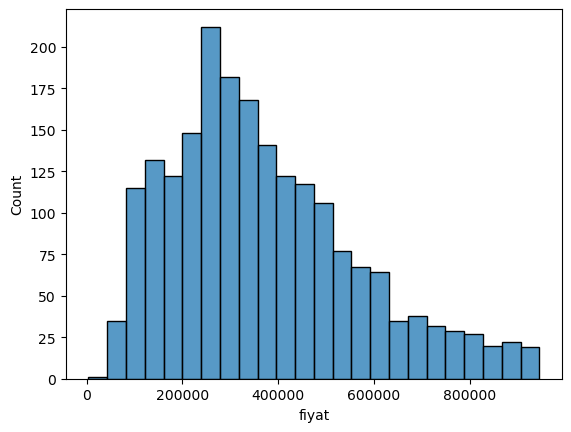

In [399]:
plt.plot()
sns.histplot(x=new_df.fiyat);

In [402]:
new_df.describe()

,fiyat,yil,kilometre,yakit_deposu,motor_hacmi,motor_gucu
count,2031.000000,2025.000000,2024.000000,1740.000000,1952.000000,1939.000000
mean,369498.535204,2009.467160,183.022432,52.227011,1493.988730,103.475503
std,195997.081653,7.877648,95.116179,7.709703,234.595849,35.217587
min,4000.000000,1977.000000,0.000000,30.000000,130.000000,41.000000
25%,228500.000000,2005.000000,115.084750,45.000000,1372.000000,90.000000
50%,333750.000000,2011.000000,177.000000,50.000000,1479.000000,100.000000
75%,480000.000000,2015.000000,245.000000,55.000000,1597.000000,115.000000
max,945000.000000,2023.000000,830.000000,95.000000,4398.000000,1200.000000


In [403]:
new_df.isnull().sum() # checking empthy values

fiyat              0
yil                6
marka              0
seri               0
model              0
kilometre          7
vites_tipi         2
yakit_tipi         0
cekis             46
yakit_deposu     291
motor_hacmi       79
motor_gucu        92
boyali_parca       0
degisen_parca      0
dtype: int64

In [404]:
new_df.vites_tipi.sort_values().value_counts()

Düz              1295
Yarı Otomatik     374
Otomatik          356
LPG & Benzin        2
Benzin              1
Elektrik            1
Name: vites_tipi, dtype: int64

In [405]:
new_df.yakit_tipi.sort_values().value_counts()

Dizel           963
LPG & Benzin    653
Benzin          408
Hibrit            3
Sedan             3
Roadster          1
Name: yakit_tipi, dtype: int64

In [406]:
new_df[new_df.yakit_tipi=="Sedan"]

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
749,4000,NaN,Renault,Zoe,2020,NaN,Elektrik,Sedan,NaN,NaN,NaN,NaN,0,0
1817,63000,NaN,Tofaş,Serçe,1993,NaN,LPG & Benzin,Sedan,44 lt,NaN,NaN,NaN,0,0
1876,62500,NaN,Tofaş,Serçe,1992,NaN,LPG & Benzin,Sedan,44 lt,NaN,NaN,NaN,0,0


In [407]:
new_df[new_df.yakit_tipi=="Roadster"]

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
335,855000,NaN,Porsche,Boxster,2001,NaN,Benzin,Roadster,NaN,NaN,NaN,NaN,0,0


In [408]:
new_df.drop(index=[749,1817,1876], axis=0, inplace=True) # yakit_tipi Sedan olanlari kaldirdik

In [409]:
new_df.drop(index=[335], axis=0, inplace=True) # yakit_tipi Roadster olanlari kaldirdik

In [410]:
new_df.yakit_tipi.sort_values().value_counts()

Dizel           963
LPG & Benzin    653
Benzin          408
Hibrit            3
Name: yakit_tipi, dtype: int64

In [411]:
new_df.loc[new_df.kilometre.isnull()]

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
415,85000,NaN,Tofaş,Serçe,1992,NaN,NaN,LPG & Benzin,NaN,NaN,NaN,NaN,0,0
1096,55000,NaN,Tofaş,Serçe,1990,NaN,NaN,LPG & Benzin,NaN,NaN,NaN,NaN,0,0
1367,108000,1990.0,BMW,3 Serisi,316i Standart,NaN,Düz,LPG & Benzin,Arkadan İtiş,NaN,1596.0,99.0,0,0


In [412]:
new_df.drop(index=[415,1096,1367], axis=0, inplace=True)

In [413]:
new_df.yakit_tipi.value_counts()

Dizel           963
LPG & Benzin    650
Benzin          408
Hibrit            3
Name: yakit_tipi, dtype: int64

In [414]:
new_df.vites_tipi.value_counts()

Düz              1294
Yarı Otomatik     374
Otomatik          356
Name: vites_tipi, dtype: int64

In [415]:
new_df.degisen_parca.value_counts()

0                 1336
Tamamı orjinal     305
1                  209
2                  113
3                   48
4                   11
6                    1
5                    1
Name: degisen_parca, dtype: int64

In [416]:
# "Tamami orjinal" olanlar icin 20 degeri atadik

new_df['degisen_parca'] = new_df['degisen_parca'].apply(lambda x: x.replace("Tamamı orjinal","20"))

In [417]:
new_df.degisen_parca.value_counts()

0     1336
20     305
1      209
2      113
3       48
4       11
6        1
5        1
Name: degisen_parca, dtype: int64

In [418]:
new_df.boyali_parca.value_counts()

0                 1029
Tamamı orjinal     305
1                  138
2                  133
3                  111
4                   93
5                   50
6                   29
8                   29
7                   27
9                   26
Tamamı              17
12                  16
10                  12
11                   9
Name: boyali_parca, dtype: int64

In [419]:
# Tamami orjinal olanlar icin 20 degeri atadik
# Tamami boyali olanlar icin 30 degeri atadik

new_df['boyali_parca'] = new_df['boyali_parca'].apply(lambda x: x.replace("Tamamı orjinal","20"))
new_df['boyali_parca'] = new_df['boyali_parca'].apply(lambda x: x.strip().replace("Tamamı","30"))

In [420]:
new_df.boyali_parca.value_counts()

0     1029
20     305
1      138
2      133
3      111
4       93
5       50
6       29
8       29
7       27
9       26
30      17
12      16
10      12
11       9
Name: boyali_parca, dtype: int64

In [421]:
new_df[new_df.yakit_deposu.isnull()]

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
8,55000,1988.0,Tofaş,Kartal,Kartal 5 Vites,129.4,Düz,LPG & Benzin,Arkadan İtiş,NaN,1581.0,83.0,0,0
14,150000,1981.0,Mercedes - Benz,E,200,500.0,Düz,LPG & Benzin,Önden Çekiş,NaN,1997.0,98.0,0,0
25,120000,2000.0,Fiat,Uno,1.4 ie S,252.0,Düz,LPG & Benzin,Önden Çekiş,NaN,1372.0,71.0,0,0
26,175000,1997.0,Peugeot,406,2.0 SV,330.0,Düz,LPG & Benzin,Önden Çekiş,NaN,1998.0,149.0,0,0
34,170000,2000.0,Renault,R 19,1.6 Europa iE,313.0,Düz,LPG & Benzin,Önden Çekiş,NaN,1598.0,90.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,45000,1993.0,Lada,Samara,1.5,500.0,Düz,LPG & Benzin,Önden Çekiş,NaN,NaN,NaN,0,0
2143,130000,1999.0,Tofaş,Şahin,1.6,56.8,Düz,LPG & Benzin,52 lt,NaN,1581.0,NaN,0,0
2144,115750,1997.0,Renault,Twingo,1.2 Base,249.0,Düz,Benzin,Önden Çekiş,NaN,1149.0,58.0,0,0
2147,125000,1997.0,Daewoo,Nexia,1.5 GL,330.0,Düz,LPG & Benzin,Önden Çekiş,NaN,1498.0,80.0,0,0


In [423]:
new_df.dropna(inplace=True)

In [424]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 0 to 2152
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fiyat          1738 non-null   int64  
 1   yil            1738 non-null   float64
 2   marka          1738 non-null   object 
 3   seri           1738 non-null   object 
 4   model          1738 non-null   object 
 5   kilometre      1738 non-null   float64
 6   vites_tipi     1738 non-null   object 
 7   yakit_tipi     1738 non-null   object 
 8   cekis          1738 non-null   object 
 9   yakit_deposu   1738 non-null   float64
 10  motor_hacmi    1738 non-null   float64
 11  motor_gucu     1738 non-null   float64
 12  boyali_parca   1738 non-null   object 
 13  degisen_parca  1738 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 203.7+ KB


In [425]:
new_df.motor_hacmi = new_df.motor_hacmi.astype(int)

In [426]:
new_df.motor_hacmi

0       1399
2       1598
3       1560
4       1598
5       1560
        ... 
2146    1390
2148    1149
2149    1590
2151    1499
2152    1582
Name: motor_hacmi, Length: 1738, dtype: int64

In [427]:
new_df['yil'] = new_df['yil'].astype(int)
# yili gunumuzden cikararak sayiyi kucultme
new_df['yil'] = new_df['yil'].apply(lambda x: 2023-x)

In [428]:
new_df['fiyat_log'] = np.log(new_df['fiyat'])

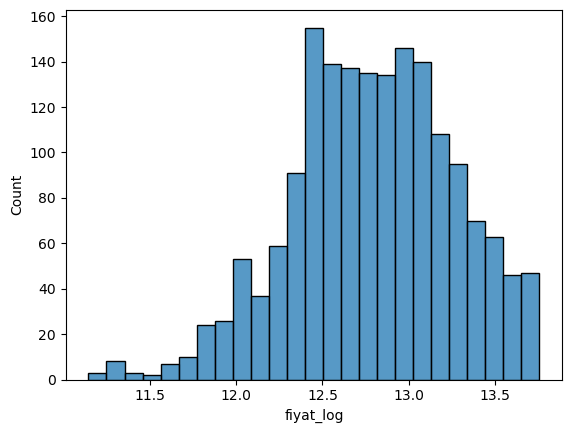

In [429]:
plt.plot()
sns.histplot(x=new_df.fiyat_log);

In [430]:
df_oto = pd.read_csv('clean_otoeksper.csv',)

In [431]:
new_df= pd.concat([new_df,df_oto])

In [432]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2694 entries, 0 to 955
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fiyat          2694 non-null   int64  
 1   yil            2694 non-null   int64  
 2   marka          2694 non-null   object 
 3   seri           2694 non-null   object 
 4   model          2694 non-null   object 
 5   kilometre      2694 non-null   float64
 6   vites_tipi     2694 non-null   object 
 7   yakit_tipi     2694 non-null   object 
 8   cekis          2694 non-null   object 
 9   yakit_deposu   2694 non-null   float64
 10  motor_hacmi    2694 non-null   int64  
 11  motor_gucu     2694 non-null   float64
 12  boyali_parca   2694 non-null   object 
 13  degisen_parca  2694 non-null   object 
 14  fiyat_log      2694 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 336.8+ KB


In [433]:
# veri tiplerini interger a cevirme
new_df['boyali_parca'] = new_df['boyali_parca'].astype(int)
new_df['degisen_parca'] = new_df['degisen_parca'].astype(int)

In [434]:
new_df.describe()

,fiyat,yil,kilometre,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca,fiyat_log
count,2.694000e+03,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000
mean,3.991456e+05,10.541574,47820.158396,51.510765,1510.354863,101.555308,3.960282,2.723460,12.800225
std,1.906952e+05,5.834671,79699.151987,7.403023,667.017632,23.106120,6.601172,6.236131,0.439938
min,6.900000e+04,0.000000,0.000000,30.000000,796.000000,41.000000,0.000000,0.000000,11.141862
25%,2.700000e+05,6.000000,147.000000,45.000000,1364.000000,90.000000,0.000000,0.000000,12.506177
50%,3.600000e+05,10.000000,240.750000,50.000000,1461.000000,95.000000,1.000000,0.000000,12.793859
75%,4.800000e+05,14.000000,84264.250000,55.000000,1595.000000,114.000000,4.000000,1.000000,13.081541
max,3.275900e+06,36.000000,397220.000000,95.000000,9990.000000,286.000000,30.000000,20.000000,15.002103


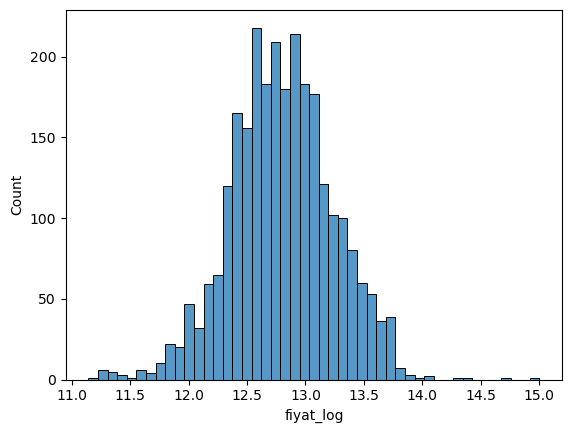

In [435]:
sns.histplot(data = new_df['fiyat_log']);

In [436]:
subset = ['fiyat','fiyat_log','yil','kilometre','yakit_deposu','motor_hacmi','motor_gucu','boyali_parca','degisen_parca']

cars = new_df.loc[:,subset]

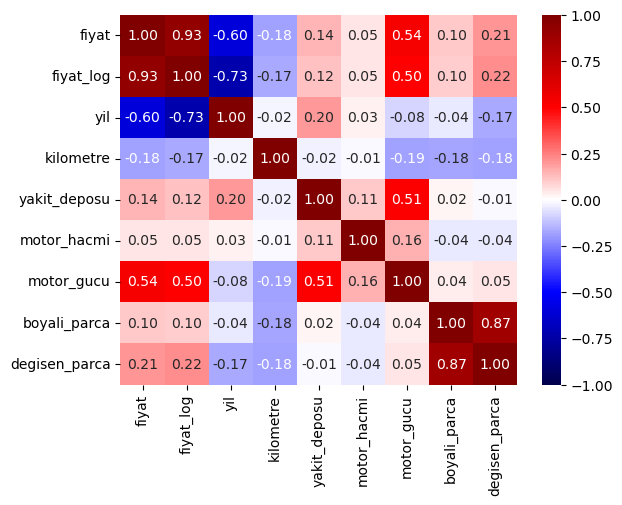

In [437]:
plt.plot()
sns.heatmap(cars.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [438]:
cars.corr()['fiyat'].sort_values(ascending=False)

fiyat            1.000000
fiyat_log        0.927793
motor_gucu       0.535965
degisen_parca    0.205110
yakit_deposu     0.144837
boyali_parca     0.102210
motor_hacmi      0.051387
kilometre       -0.180999
yil             -0.599387
Name: fiyat, dtype: float64

In [446]:
cars[cars.duplicated(keep='first')]

,fiyat,fiyat_log,yil,kilometre,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
241,540000,13.199324,10,198.000,70.0,1598,105.0,0,0
542,555000,13.226723,5,74.640,43.0,1582,136.0,1,0
984,349999,12.765686,10,215.000,45.0,1598,90.0,4,0
1887,264500,12.485597,9,185.659,45.0,1248,95.0,20,20
2105,388000,12.868761,5,108.000,45.0,1248,95.0,0,0
384,320000,12.676076,7,150000.000,45.0,1248,94.0,7,3


In [450]:
cars.drop_duplicates(inplace=True)

In [463]:
cars.columns

Index(['fiyat', 'fiyat_log', 'yil', 'kilometre', 'yakit_deposu', 'motor_hacmi',
       'motor_gucu', 'boyali_parca', 'degisen_parca'],
      dtype='object')

In [ ]:
#Training Asamasi

In [452]:

X = cars.drop(columns=['fiyat','fiyat_log']) 
y = cars['fiyat_log']

# Veri setinin %20'lik kısmını Test aşaması için saklıyoruz
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [454]:
print("X:", X.shape)
print("y:", y.shape)
print("X_test:", X_test.shape)
print("y_test", y_test.shape)

X: (2150, 7)
y: (2150,)
X_test: (538, 7)
y_test (538,)


In [455]:
#validation kismini ayirma
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [456]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val", y_val.shape)

X_train: (1612, 7)
y_train: (1612,)
X_val: (538, 7)
y_val (538,)


In [464]:
# Lineer Regresyon
# Modeli Oluşturma
lr1 = LinearRegression()

# Featureları Oluşturma
X = cars.iloc[:, 2:] # fiyat_log haricindeki tum sayisal sutunlar

# Targetı Oluşturma
y = cars.iloc[:, 1] #fiyat_log sutunu

# Modeli Eğitme
lr1.fit(X, y)

# R2 Değeri
r_squared1 = lr1.score(X,y)
print("R2:", round(r_squared1,3))

# Adjusted R2 Değeri
adjusted_r_squared1 = 1 - (1-r_squared1)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared1,3))


R2: 0.748
Adjusted R2: 0.747


In [465]:
# statsmodels
# Modeli Oluşturma
stmodel1 = smf.ols('fiyat_log ~ yil + kilometre + yakit_deposu + motor_hacmi + motor_gucu + boyali_parca + degisen_parca', data=cars)

# Modeli Eğitme
stmod1 =stmodel1.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
stmod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fiyat_log   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1137.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:49:45   Log-Likelihood:                 244.54
No. Observations:                2688   AIC:                            -473.1
Df Residuals:                    2680   BIC:                            -425.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.4343      0.032    394.673      0.000      12.372      12.496
yil              -0.0521      0.001    -65.471      0.000      -0.054      -0.051
kilometre     -5.395e-07   5.58e-08     -9.661      0.000   -6.49e-07    -4.3e-07
yakit_deposu      0.0031      0.001      4.327      0.000       0.002       0.004
motor_hacmi     3.88e-06   6.49e-06      0.598      0.550   -8.84e-06    1.66e-05
motor_gucu        0.0076      0.000     33.393      0.000       0.007       0.008
boyali_parca     -0.0047      0.001     -3.484      0.001      -0.007      -0.002
degisen_parca     0.0089      0.001      6.176      0.000       0.006       0.012
==============================================================================
Omnibus:                       24.021   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.512
Skew:                           0.021   Prob(JB):                     7.15e-09
Kurtosis:                       3.577   Cond. No.                     6.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# marka , yakit-tipi, vites_tipi ve cekis ozellikleri icin dummy variable olusturma
cars = pd.get_dummies(new_df, columns=['marka', 'vites_tipi', 'yakit_tipi','cekis'], drop_first=True)
cars

In [467]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2694 entries, 0 to 955
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fiyat                     2694 non-null   int64  
 1   yil                       2694 non-null   int64  
 2   seri                      2694 non-null   object 
 3   model                     2694 non-null   object 
 4   kilometre                 2694 non-null   float64
 5   yakit_deposu              2694 non-null   float64
 6   motor_hacmi               2694 non-null   int64  
 7   motor_gucu                2694 non-null   float64
 8   boyali_parca              2694 non-null   int64  
 9   degisen_parca             2694 non-null   int64  
 10  fiyat_log                 2694 non-null   float64
 11  marka_Audi                2694 non-null   uint8  
 12  marka_BMW                 2694 non-null   uint8  
 13  marka_Bmw                 2694 non-null   uint8  
 14  marka_Che

In [468]:
cars.drop(columns=['fiyat'], inplace=True)

In [469]:
cars.drop(columns=['seri','model'], inplace=True)

In [470]:
cars.to_csv('cars_reg.csv') # last version of our dataset 

In [471]:
# reneming columns name for statsmodel
cars.rename(columns={'marka_Aston Martin':'marka_Aston_Martin','marka_DS Automobiles':'marka_DS_Automobiles','marka_Mercedes - Benz':'marka_Mercedes_Benz'}, inplace=True)

In [472]:
cars.rename(columns={'vites_tipi_Yarı Otomatik':'vites_tipi_Yarı_Otomatik',
'yakit_tipi_LPG & Benzin':'yakit_tipi_LPG_Benzin', 'cekis_Arkadan İtiş':'cekis_Arkadan_İtiş',
       'cekis_Önden Çekiş':'cekis_Önden_Çekiş'}, inplace=True)

In [473]:
cars.columns

Index(['yil', 'kilometre', 'yakit_deposu', 'motor_hacmi', 'motor_gucu',
       'boyali_parca', 'degisen_parca', 'fiyat_log', 'marka_Audi', 'marka_BMW',
       'marka_Bmw', 'marka_Chery', 'marka_Chevrolet', 'marka_Citroen',
       'marka_DS_Automobiles', 'marka_Dacia', 'marka_Daewoo', 'marka_Fiat',
       'marka_Ford', 'marka_Geely', 'marka_Honda', 'marka_Hyundai',
       'marka_Jeep', 'marka_Kia', 'marka_Lada', 'marka_Lancia', 'marka_MINI',
       'marka_Mazda', 'marka_Mercedes', 'marka_Mercedes_Benz',
       'marka_Mitsubishi', 'marka_Nissan', 'marka_Opel', 'marka_Peugeot',
       'marka_Proton', 'marka_Renault', 'marka_Rover', 'marka_Seat',
       'marka_Skoda', 'marka_Suzuki', 'marka_Tata', 'marka_Tofaş',
       'marka_Toyota', 'marka_Volkswagen', 'marka_Volvo',
       'vites_tipi_Otomatik', 'vites_tipi_Yarı_Otomatik', 'yakit_tipi_Dizel',
       'yakit_tipi_Hibrit', 'yakit_tipi_LPG_Benzin', 'cekis_4x4',
       'cekis_Arkadan_İtiş', 'cekis_Önden_Çekiş'],
      dtype='object')

In [565]:
# creating X and y parameters

X = cars.loc[:,['yil','kilometre','yakit_deposu','motor_hacmi','motor_gucu','boyali_parca','degisen_parca',
                'marka_Audi','marka_BMW','marka_Chery','marka_Chevrolet',
                'marka_Citroen','marka_DS_Automobiles','marka_Dacia','marka_Daewoo',
                'marka_Fiat','marka_Ford','marka_Geely','marka_Honda','marka_Hyundai','marka_Kia',
                'marka_Lada','marka_MINI','marka_Mazda','marka_Mercedes_Benz',
                'marka_Mitsubishi','marka_Nissan','marka_Opel', 'marka_Peugeot',
       'marka_Proton', 'marka_Renault', 'marka_Rover',
       'marka_Seat', 'marka_Skoda', 'marka_Suzuki', 'marka_Tata',
       'marka_Tofaş', 'marka_Toyota', 'marka_Volkswagen', 'marka_Volvo',
       'vites_tipi_Otomatik', 'vites_tipi_Yarı_Otomatik', 'yakit_tipi_Dizel',
       'yakit_tipi_Hibrit', 'yakit_tipi_LPG_Benzin', 'cekis_Arkadan_İtiş',
       'cekis_Önden_Çekiş']]
y = cars.fiyat_log


# defining of test dataset
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#defining of validation dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [476]:
# with Statsmodels
statmod2 = smf.ols('fiyat_log ~ yil + kilometre + yakit_deposu + motor_hacmi + motor_gucu + boyali_parca + degisen_parca +  marka_Audi + marka_BMW + marka_Chery + marka_Chevrolet + marka_Citroen + marka_DS_Automobiles + marka_Dacia + marka_Daewoo + marka_Fiat + marka_Ford + marka_Geely + marka_Honda + marka_Hyundai + marka_Kia + marka_Lada + marka_MINI + marka_Mazda + marka_Mercedes_Benz + marka_Mitsubishi + marka_Nissan + marka_Opel + marka_Peugeot + marka_Proton + marka_Renault + marka_Rover + marka_Seat + marka_Skoda + marka_Suzuki + marka_Tata + marka_Tofaş + marka_Toyota + marka_Volkswagen + marka_Volvo + vites_tipi_Otomatik + vites_tipi_Yarı_Otomatik + yakit_tipi_Dizel + yakit_tipi_Hibrit + yakit_tipi_LPG_Benzin + cekis_Arkadan_İtiş + cekis_Önden_Çekiş', data=cars)

# Modeli Eğitme
sm2 = statmod2.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fiyat_log   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     324.9
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:51:35   Log-Likelihood:                 966.40
No. Observations:                2694   AIC:                            -1837.
Df Residuals:                    2646   BIC:                            -1554.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   13.3555      0.076    174.664      0.000      13.206      13.505
yil                         -0.0563      0.001    -72.013      0.000      -0.058      -0.055
kilometre                -1.999e-07   4.56e-08     -4.387      0.000   -2.89e-07   -1.11e-07
yakit_deposu                 0.0019      0.001      3.100      0.002       0.001       0.003
motor_hacmi              -6.847e-06   5.13e-06     -1.334      0.182   -1.69e-05    3.21e-06
motor_gucu                   0.0039      0.000     16.835      0.000       0.003       0.004
boyali_parca                -0.0062      0.001     -5.858      0.000      -0.008      -0.004
degisen_parca                0.0085      0.001      7.474      0.000       0.006       0.011
marka_Audi                   0.1413      0.055      2.593      0.010       0.034       0.248
marka_BMW                   -0.0897      0.053     -1.689      0.091      -0.194       0.014
marka_Chery                 -0.7564      0.177     -4.264      0.000      -1.104      -0.409
marka_Chevrolet             -0.3332      0.057     -5.880      0.000      -0.444      -0.222
marka_Citroen               -0.2806      0.051     -5.513      0.000      -0.380      -0.181
marka_DS_Automobiles        -0.2363      0.177     -1.331      0.183      -0.584       0.112
marka_Dacia                 -0.2886      0.053     -5.484      0.000      -0.392      -0.185
marka_Daewoo                -0.3799      0.178     -2.132      0.033      -0.729      -0.030
marka_Fiat                  -0.3490      0.048     -7.222      0.000      -0.444      -0.254
marka_Ford                  -0.1176      0.049     -2.409      0.016      -0.213      -0.022
marka_Geely                 -0.5962      0.130     -4.593      0.000      -0.851      -0.342
marka_Honda                  0.0119      0.052      0.231      0.817      -0.089       0.113
marka_Hyundai               -0.2410      0.049     -4.898      0.000      -0.337      -0.145
marka_Kia                   -0.2643      0.062     -4.296      0.000      -0.385      -0.144
marka_Lada                  -0.7105      0.090     -7.852      0.000      -0.888      -0.533
marka_MINI                   0.1650      0.098      1.688      0.092      -0.027       0.357
marka_Mazda                 -0.0113      0.083     -0.136      0.892      -0.173       0.151
marka_Mercedes_Benz          0.1096      0.057      1.936      0.053      -0.001       0.221
marka_Mitsubishi            -0.2676      0.098     -2.734      0.006      -0.460      -0.076
marka_Nissan                -0.0968      0.059     -1.642      0.101      -0.212       0.019
marka_Opel                  -0.1587      0.049     -3.244      0.001      -0.255      -0.063
marka_Peugeot               -0.2801      0.049     -5.682      0.000      -0.377      -0.183
marka_Proton  

In [477]:
# Lineer Regresyon Modeli 
lr2 = LinearRegression()


# Modeli Eğitme
lr2.fit(X, y)

# R2 Değeri
r_squared2 = lr2.score(X,y)
print("R2:", round(r_squared2,3))

# Adjusted R2 Değeri
adjusted_r_squared2 = 1 - (1-r_squared2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared2,3))


R2: 0.852
Adjusted R2: 0.849


In [478]:
scores = []
poly_degrees = 4

for degree in range(1, poly_degrees+1):
    
    poly = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly.fit_transform(X_train.values)
    X_val_poly = poly.transform(X_val.values)
    
    lm_poly = LinearRegression()

    lm_poly.fit(X_train_poly, y_train)

    scores.append(lm_poly.score(X_val_poly, y_val))

# Sonuçları inceleme    
for degree, score in enumerate(scores):
    print(f"Polynomial Degree: {degree+1}, Validation Score: {score:.3f}")

Polynomial Degree: 1, Validation Score: 0.831
Polynomial Degree: 2, Validation Score: -140.941
Polynomial Degree: 3, Validation Score: -7225184952.465
Polynomial Degree: 4, Validation Score: -57110028427.868


In [537]:
# Lasso model
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from joblib import load

lasso_model = Lasso(alpha = 0.00005)
lasso_model.fit(X_train, y_train)

test_set_pred = lasso_model.predict(X_val)
print('R2 of Lasso Model:', r2_score(y_val, test_set_pred))

R2 of Lasso Model: 0.8378937811671783


In [584]:
#Standart Scaler degerleriyle
# Ridge Model
std_scale = StandardScaler()
X_ss = std_scale.fit_transform(X_train.values)
X_val_ss = std_scale.fit_transform(X_val.values)

ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_ss, y_train)

test_set_pred2 = ridge_model.predict(X_val_ss)
print('R2 of Ridge Model for Validation:', round(r2_score(y_val, test_set_pred2),3))

R2 of Ridge Model for Validation: 0.831


In [585]:
# Standart Scaler degerleriyle
#Lasso Model
std_scale = StandardScaler()
X_ss = std_scale.fit_transform(X_train.values)
X_val_ss = std_scale.fit_transform(X_val.values)

lasso_model = Lasso(alpha = 0.00005)
lasso_model.fit(X_ss, y_train)

test_set_pred = lasso_model.predict(X_val_ss)
print('R2 of Lasso Model for Validation:', round(r2_score(y_val, test_set_pred),3))

R2 of Lasso Model for Validation: 0.831


In [549]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

alphalist = 10**(np.linspace(0,4,200)) # Daha geniş aralıkta inceleme yapmak için np.linspace() parametrelerini değiştirin
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for index, curr_alpha in enumerate(alphalist):

    # Her bir döngüde ilk olarak Scaling uygula ve sonrasında belirtilen alpha değerinde Lasso'yu çalıştır
    steps = [('standardize', StandardScaler()),
             ('lasso', Lasso(alpha = curr_alpha, tol=0.1))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)

    val_set_pred = pipe.predict(X_val.values)
    err_vec_val[index] = mean_squared_error(y_val, val_set_pred)

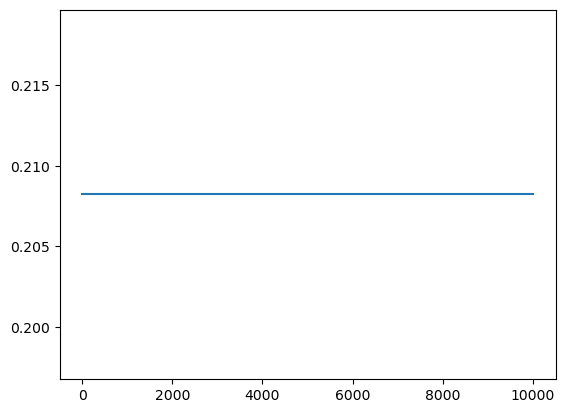

In [550]:
plt.plot(alphalist, err_vec_val);


In [548]:
np.max(err_vec_val)  # Lasso kullanarak ulaşabildiğimiz maximum R2

0.20821546420985482

In [545]:
alphalist[np.argmax(err_vec_val)] # max deger icin alpha degeri

1.0

In [486]:
alphalist2 = 10**(np.linspace(0,4,200)) # Daha geniş aralıkta inceleme yapmak için np.linspace() parametrelerini değiştirin
err_vec_val2 = np.zeros(len(alphalist2))
err_vec_train2 = np.zeros(len(alphalist2))

for index, curr_alpha in enumerate(alphalist2):

    # Her bir döngüde ilk olarak Scaling uygula ve sonrasında belirtilen alpha değerinde Lasso'yu çalıştır
    steps = [('standardize', StandardScaler()),
             ('ridge', Ridge(alpha = curr_alpha, tol=0.1))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)

    val_set_pred = pipe.predict(X_val.values)
    err_vec_val2[index] = mean_squared_error(y_val, val_set_pred)

In [487]:
np.max(err_vec_val2)  # Ridge kullanarak ulaşabildiğimiz maximum R2

0.14845008322073383

In [488]:
alphalist[np.argmax(err_vec_val2)] # max deger icin alpha degeri

10000.0

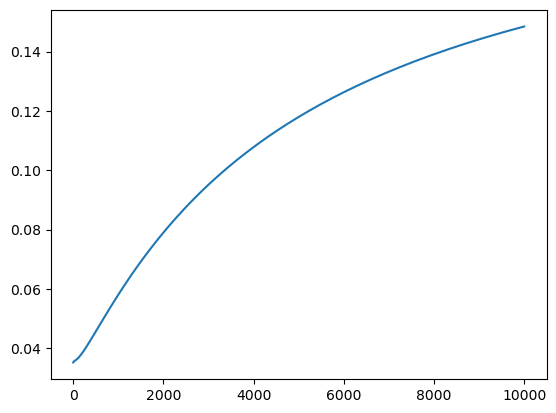

In [489]:
plt.plot(alphalist2, err_vec_val2);

In [590]:
from sklearn.preprocessing import MinMaxScaler

lreg2 = LinearRegression()

minmax_scale = MinMaxScaler()
x_train_mms = minmax_scale.fit_transform(X_train.values)
x_val_mms = minmax_scale.fit_transform(X_val.values)

lreg2.fit(x_train_mms,y_train)

pred = lreg2.predict(x_val_mms)

mse = np.mean((pred - y_val)**2)

print("Validation Score: ", round(lreg2.score(x_val_mms, y_val),3))
print("MSE: ", round((mse),3))

Validation Score:  0.698
MSE:  0.063


In [551]:
# en iyi modeli bulmak icin cross-validetion

from sklearn.model_selection import KFold


# Verimizi 5 parçaya ayırmaya deneyelim (n_splits=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validation sonuçlarını toplayacağımız listeler
cv_lm_r2 = []
cv_lm_reg_r2 = []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

    # Modellerin oluşturulması
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)
    
    # Modellerin eğitimi
    lm.fit(X_train, y_train)
    cv_lm_r2.append(round(lm.score(X_val, y_val),3))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2.append(round(lm_reg.score(X_val_scaled, y_val),3))

# Sonuçların toplanması
print('Linear Regression R2:', cv_lm_r2)
print('Ridge Regression R2:', cv_lm_reg_r2, '\n')

print(f'Linear Regression R2: {np.mean(cv_lm_r2):.3f} +- {np.std(cv_lm_r2):.3f}')
print(f'Ridge Regression R2: {np.mean(cv_lm_reg_r2):.3f} +- {np.std(cv_lm_reg_r2):.3f}')

Linear Regression R2: [0.837, 0.813, 0.845, 0.838, 0.859]
Ridge Regression R2: [0.837, 0.816, 0.845, 0.842, 0.86] 

Linear Regression R2: 0.838 +- 0.015
Ridge Regression R2: 0.840 +- 0.014


In [492]:
# Test veriseti sonuclari
lr3 = LinearRegression()


lr3.fit(X_test, y_test)

# Test verisetindeki R2 Değeri
r_squared3 = lr3.score(X_test, y_test)
print("R2:", round(r_squared3,3))

# Adjusted R2 Değeri
adjusted_r_squared3 = 1 - (1-r_squared3)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared3,3))


R2: 0.865
Adjusted R2: 0.862


In [561]:
# Test veriseti Ridge sonuclari

ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_test, y_test)

test_set_pred2 = ridge_model.predict(X_test)
print('R2 of Ridge Model for Test:', round(r2_score(y_test, test_set_pred2),3))


R2 of Ridge Model for Test: 0.86


In [570]:
lr3.predict(X_test) # logaritmasi alinmis degerler kullandigimizdan

array([12.61064161, 12.7758472 , 13.26674011, 12.8167454 , 12.36277071,
       12.9778431 , 12.8397296 , 12.55120823, 13.0016387 , 12.3880705 ,
       12.95435742, 13.13036524, 12.75127095, 12.36152833, 13.02552735,
       12.86041962, 12.50952462, 12.67651916, 12.61139311, 12.31110916,
       13.22577043, 12.6205183 , 12.53848031, 13.63839694, 12.62435273,
       12.75020144, 11.66461829, 13.01335412, 12.86924049, 12.43040156,
       12.72664399, 12.64179418, 12.32339752, 13.08148611, 12.95354429,
       13.54079391, 13.04598633, 12.82749885, 12.68990524, 12.17677549,
       13.08783686, 13.40146342, 13.1004038 , 11.87241855, 13.04088331,
       12.53793452, 12.77333233, 13.55038485, 12.50578233, 13.07277423,
       12.13685914, 12.54834508, 13.13153827, 13.20330115, 12.86446019,
       12.98439653, 12.17997716, 12.67139349, 12.7141235 , 12.37290839,
       13.02399516, 13.11490615, 11.61121285, 12.55092385, 12.7243029 ,
       13.0705128 , 12.86995115, 12.56947584, 12.32422885, 12.59

In [571]:
# X_test veriseti tahminleri:
np.exp(lr3.predict(X_test))

array([299731.27845223, 353573.68974543, 577659.63380466, 368333.99562065,
       233928.48186022, 432718.68046156, 376897.8973603 , 282436.27464997,
       443138.96929209, 239922.32515605, 422674.39821398, 504016.97902569,
       344990.08291202, 233638.03278388, 453852.41547147, 384777.15052605,
       270905.30836717, 320141.7551637 , 299956.60885444, 222150.23382499,
       554471.35497198, 302706.29679397, 278864.22908022, 837684.60379855,
       303869.23098602, 344621.31132674, 116380.26906663, 448361.0559215 ,
       388186.23317704, 250296.51628479, 336597.78739958, 309215.64220695,
       224896.93742648, 479973.47057232, 422330.84828165, 759787.37944947,
       463233.41126642, 372316.22882862, 324456.00796597, 194225.56931999,
       483031.36241428, 660969.79054372, 489139.89078269, 143260.30215915,
       460875.54085379, 278712.06913032, 352685.6161407 , 767109.51194567,
       269893.39549056, 475810.15888892, 186625.48610046, 281628.77459257,
       504608.55729845, 5

In [572]:
# Saving the Statsmodels:

sm2.save('cars_sm_model.pkl')

In [573]:
#Saving the linear model:
from joblib import dump, load

dump(lm , 'cars_sk_model.pkl')
lr2 = load('cars_sk_model.pkl')

In [575]:
X_test['fiyat_tahmini'] = np.exp(lr3.predict(X_test))
X_test

,yil,kilometre,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca,marka_Audi,marka_BMW,marka_Chery,...,marka_Volkswagen,marka_Volvo,vites_tipi_Otomatik,vites_tipi_Yarı_Otomatik,yakit_tipi_Dizel,yakit_tipi_Hibrit,yakit_tipi_LPG_Benzin,cekis_Arkadan_İtiş,cekis_Önden_Çekiş,fiyat_tahmini
544,7,163436.000,50.0,1461,90.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,299731.278452
482,8,83000.000,60.0,1598,105.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,353573.689745
463,3,74.500,45.0,1598,120.0,20,20,0,0,0,...,0,0,0,1,1,0,0,0,1,577659.633805
662,12,197.000,53.0,1582,115.0,3,2,0,0,0,...,0,0,1,0,1,0,0,0,1,368333.995621
688,18,157015.000,60.0,1753,75.0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,1,233928.481860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2,46448.000,50.0,1499,98.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,508513.939739
2108,7,186.500,55.0,1422,90.0,1,2,0,0,0,...,0,0,0,1,1,0,0,0,1,487881.857356
442,18,370.000,50.0,1590,110.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,288719.841009
263,6,77.055,49.0,1461,110.0,3,0,0,0,0,...,0,0,0,1,1,0,0,0,1,497001.809530
